In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S13')

In [0]:
import cv2
import numpy as np

In [0]:
yolov3_weights_file = "/content/gdrive/My Drive/eva-04/S13/yolov3.weights"
yolov3_cfg_file = "/content/gdrive/My Drive/eva-04/S13/yolov3.cfg"
yolov3_coco_names_file = "/content/gdrive/My Drive/eva-04/S13/coco.names"

In [0]:
net = cv2.dnn.readNet(yolov3_weights_file, yolov3_cfg_file)

classes = []
with open(yolov3_coco_names_file, "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
yolov3_image_file = "/content/gdrive/My Drive/eva-04/S13/ganji3_detect.jpg"

In [23]:
img = cv2.imread(yolov3_image_file)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
print("after resize=",img.shape)

after resize= (384, 512, 3)


In [24]:
scale = 1/255.0
blob = cv2.dnn.blobFromImage(img, scale, (416, 416), (0, 0, 0), True, crop=False)
#blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

print("blob shape=",blob.shape)

net.setInput(blob)
outs = net.forward(output_layers)


blob shape= (1, 3, 416, 416)


In [0]:
class_ids = []
confidences = []
boxes = []
threshold = 0.5
for out in outs:
    for detection in out:
        scores = detection[5:]
        #print(scores)
        class_id = np.argmax(scores)
        #print("class=",class_id)
        confidence = scores[class_id]
        #print(confidence > threshold )
        if confidence > threshold:
            print("Confidence is greater than threshold:",threshold)
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [0]:
font = cv2.FONT_HERSHEY_PLAIN
#print(indexes)

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        print('clsid=',class_ids[i])
        label = str(classes[class_ids[i]])
        print(label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


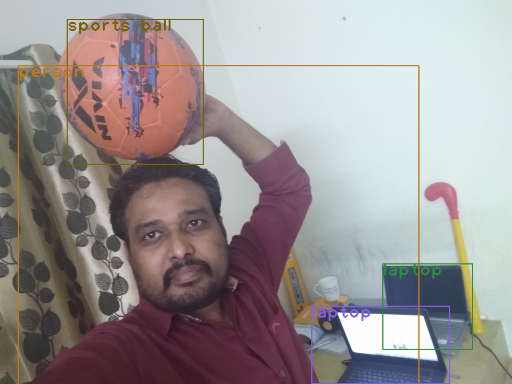

In [28]:
#cv2.imshow("Image", img)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()